# SC1015 Mini-Project

In [1]:
#Import Essential Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
sns.set_style("dark")

### Import the Dataset
From Kaggle, the dataset is already split into **train** and **test** dataset. Therefore, we will import both of them separately. Furthermore, we will take a quick glance at the dateset by using the `head` function.

In [5]:
#Import the train dataset
train_df = pd.read_csv("aug_train.csv")
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
test_df = pd.read_csv("aug_test.csv")
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


The features of the dataset are as following: <br>
    `enrolle_id`             : Unique ID for enrollee <br>
    `city`                   : City code <br>
    `city_development_index` : Development index of the city (scaled) <br>
    `gender`                 : Gender of enrollee <br>
    `relevent_experience`    : Relevant experience of enrollee <br>
    `enrolled_university`    : Type of University course currently enrolling if any <br>
    `education_level`        : Education level of enrollee <br>
    `major_discipline`       : Education major discipline of enrollee <br>
    `experience`             : Total experience in years <br>
    `company_size`           : No of employees in current employer's company <br>
    `company_type`           : Type of current employer <br>
    `last_new_job`           : Difference in years between previous job and current job <br>
    `training_hours`         : Training hours completed <br>
    `target`                 : 0 – Not looking for job change, 1 – Looking for a job change <br>

Next, we will investigate the dataset information by checking its `info` and `shape`

In [7]:
#Check the shape of each dataset
print("Shape")
print("train_df: ", train_df.shape)
print("test_df: ", test_df.shape)

Shape
train_df:  (19158, 14)
test_df:  (2129, 13)


In [8]:
#Check the info of each dataset
print("train_df:")
train_df.info()
print()
print("test_df:")
test_df.info()

train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), obj

We notice that the size of **test** dataset is approximately 10% of **train** dataset. Moreover, both datasets have some missing values in some of the variables and the **test** dataset does not provide the `target` column.

# Data Cleaning

## Enrollee Id and City checking and cleaning

Firstly, we need to drop some irrelevant columns in the datasets.

In [9]:
#Compare the number of enrollee_id and shape
print(train_df.enrollee_id.nunique(), test_df.enrollee_id.nunique())
print(train_df.shape, test_df.shape)

19158 2129
(19158, 14) (2129, 13)


`enrollee_id` is unique for every datapoint and we don't need this as a feature so we can just drop it.

In [10]:
#Drop enrollee_id
train_df.drop(columns='enrollee_id', inplace = True)
test_df.drop(columns = 'enrollee_id', inplace = True)

In [11]:
#Count the unique value for city
print("Unique values")
print("train_df:", train_df['city'].nunique())
print("test_df:", test_df['city'].nunique())

Unique values
train_df: 123
test_df: 108


In [12]:
#Convert the city and city_development_index into a dictionary
pd.Series(train_df.city_development_index.values, index=train_df.city).to_dict()

{'city_103': 0.92,
 'city_40': 0.7759999999999999,
 'city_21': 0.624,
 'city_115': 0.789,
 'city_162': 0.767,
 'city_176': 0.764,
 'city_160': 0.92,
 'city_46': 0.762,
 'city_61': 0.913,
 'city_114': 0.926,
 'city_13': 0.8270000000000001,
 'city_159': 0.843,
 'city_102': 0.804,
 'city_67': 0.855,
 'city_100': 0.887,
 'city_16': 0.91,
 'city_71': 0.884,
 'city_104': 0.924,
 'city_64': 0.6659999999999999,
 'city_101': 0.5579999999999999,
 'city_83': 0.923,
 'city_105': 0.794,
 'city_73': 0.754,
 'city_75': 0.939,
 'city_41': 0.8270000000000001,
 'city_11': 0.55,
 'city_93': 0.865,
 'city_90': 0.698,
 'city_36': 0.893,
 'city_20': 0.7959999999999999,
 'city_57': 0.866,
 'city_152': 0.698,
 'city_19': 0.682,
 'city_65': 0.802,
 'city_74': 0.579,
 'city_173': 0.878,
 'city_136': 0.897,
 'city_98': 0.949,
 'city_97': 0.925,
 'city_50': 0.8959999999999999,
 'city_138': 0.836,
 'city_82': 0.693,
 'city_157': 0.769,
 'city_89': 0.925,
 'city_150': 0.698,
 'city_70': 0.698,
 'city_175': 0.775999

`city` has more than 100 unique values and it has a direct relationship with `city_development_index` because each `city` corresponds to one `city_development_index` only. Therefore, it is better for us to drop `city` because it is difficult to tackle with too many unique values and we can use `city_development_index` instead.

In [13]:
#Drop city
train_df.drop(columns='city', inplace = True)
test_df.drop(columns = 'city', inplace = True)

Furthermore, before we do the data cleaning, let's try to visualise the propotions of missing values in each variable first.

In [14]:
#finding the percentages of missing values
print("Missing value percentages")
print("Train_df:")
for col in train_df.columns:
    null_val = train_df[col].isnull().sum()
    null_prec = (null_val * 100) / train_df.shape[0]
    print('%s , Missing: %d (%.1f%%)' % (col, null_val, null_prec))
print()
print("Test_df:")
for col in test_df.columns:
    null_val = test_df[col].isnull().sum()
    null_prec = (null_val * 100) / test_df.shape[0]
    print('%s , Missing: %d (%.1f%%)' % (col, null_val, null_prec))

Missing value percentages
Train_df:
city_development_index , Missing: 0 (0.0%)
gender , Missing: 4508 (23.5%)
relevent_experience , Missing: 0 (0.0%)
enrolled_university , Missing: 386 (2.0%)
education_level , Missing: 460 (2.4%)
major_discipline , Missing: 2813 (14.7%)
experience , Missing: 65 (0.3%)
company_size , Missing: 5938 (31.0%)
company_type , Missing: 6140 (32.0%)
last_new_job , Missing: 423 (2.2%)
training_hours , Missing: 0 (0.0%)
target , Missing: 0 (0.0%)

Test_df:
city_development_index , Missing: 0 (0.0%)
gender , Missing: 508 (23.9%)
relevent_experience , Missing: 0 (0.0%)
enrolled_university , Missing: 31 (1.5%)
education_level , Missing: 52 (2.4%)
major_discipline , Missing: 312 (14.7%)
experience , Missing: 5 (0.2%)
company_size , Missing: 622 (29.2%)
company_type , Missing: 634 (29.8%)
last_new_job , Missing: 40 (1.9%)
training_hours , Missing: 0 (0.0%)


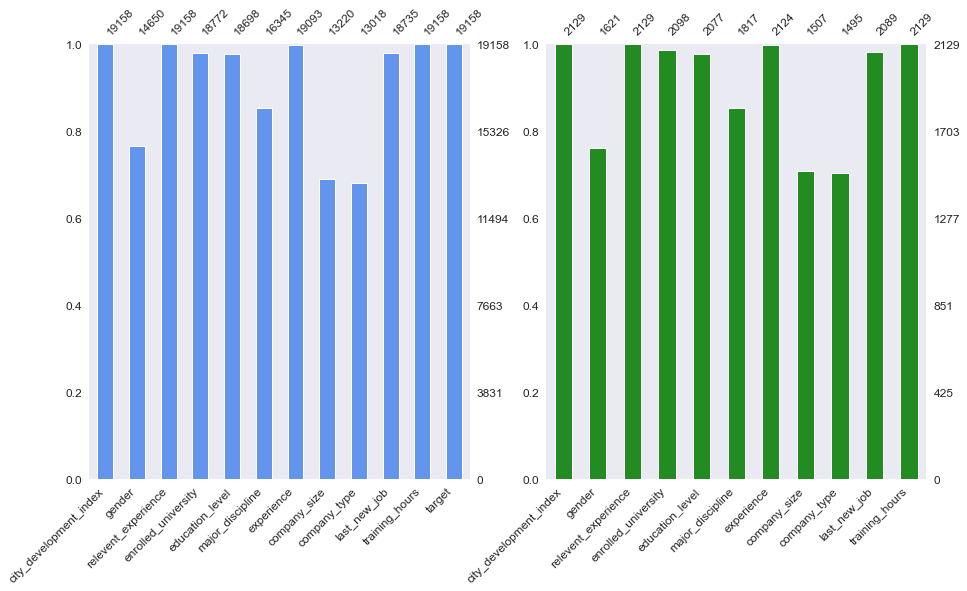

In [15]:
#Plot barplot for missing value percentages of each variables
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))
missingno.bar(train_df, color="cornflowerblue", figsize=(10,5), fontsize=12, ax=ax[0]);
missingno.bar(test_df, color="forestgreen", figsize=(10,5), fontsize=12, ax=ax[1]);

From the result, we can see that there are 4 variables `[enrolled_university, education_level, experience, last_new_job]` which missing values are less than 3%. Therefore, we can just directly drop these missing values because it will not affect much to the datasets. However, `[gender, major_discipline, company_size, company_type]` have a significant amount of missing values, thus we will use another method to deal with them.

In [16]:
#Drop the missing values of enrolled_university, education_level, experience, and last_new_job
list = ['enrolled_university', 'education_level', 'experience', 'last_new_job']
for col in list:
    train_df.drop(train_df.loc[train_df[col].isna()].index, inplace = True)
    test_df.drop(test_df.loc[test_df[col].isna()].index, inplace = True)

In [17]:
#Create a dataframe for showing the number of remaining missing values
pd.DataFrame([train_df.isna().sum(), test_df.isna().sum()], ["NA values contain in train", "NA values contain in test"])

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
NA values contain in train,0.0,3863.0,0.0,0.0,0.0,2222.0,0.0,5310.0,5476.0,0.0,0.0,0.0
NA values contain in test,0.0,443.0,0.0,0.0,0.0,249.0,0.0,577.0,579.0,0.0,0.0,NaN


After we have cleaned those 4 variables, we try to find the relationship between the variables of the missing values by using a heatmap.

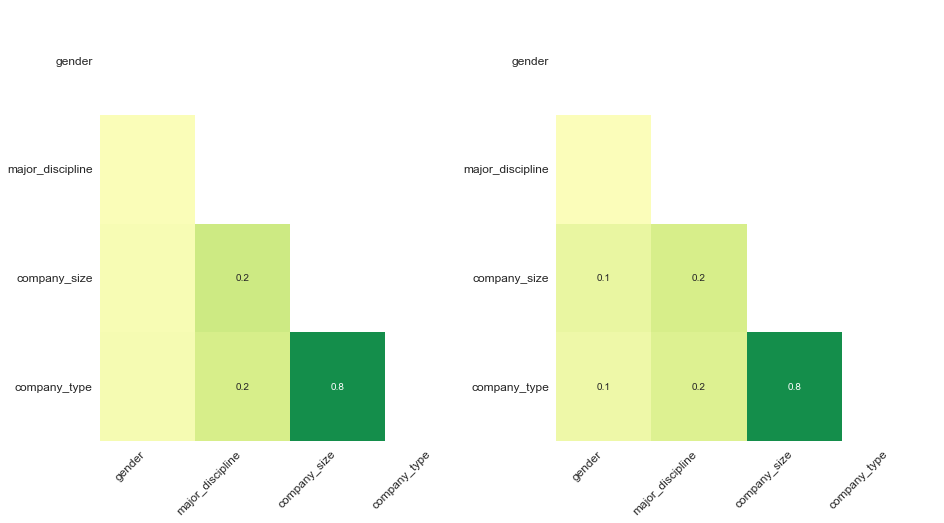

In [18]:
#Plot heatmap for showing nullity correlation between various variables in datasets 
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 8))
missingno.heatmap(train_df, figsize=(10,5), fontsize=12, cmap="RdYlGn", vmax=1, vmin=-1, cbar = False, ax = ax[0]);
missingno.heatmap(test_df, figsize=(10,5), fontsize=12, cmap="RdYlGn", vmax=1, vmin=-1, cbar = False, ax = ax[1]);

We notice that there is a high correlation value between `company_type` and `company_size`. This means that these two values will often come in pairs. This is understandable because people who are not employed do not have any records of `company_type` and `company_size`, thus these values are empty.

## Company Type and Company Size checking and cleaning
We take a look at the categories of both company type and company size by using `unique`.

In [19]:
#Check the categories of company_size
train_df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [20]:
test_df.company_size.unique()

array(['<10', nan, '10/49', '10000+', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

It seems that there is a misinterpretation in **train** `company_size`, which **10-49** becomes **Oct-49**. In **test** `company_size`, we unify the labels by changing **10/49** to **10-49**. Furthermore, we also change the label of **100-500** to **100-499** such that all the labels do not overlap each other. 

In [21]:
#Rename the labels
train_df.company_size.replace('Oct-49', '10-49', inplace=True)
train_df.company_size.replace('100-500', '100-499', inplace=True)
test_df.company_size.replace('10/49', '10-49', inplace=True)
test_df.company_size.replace('100-500', '100-499', inplace=True)

In [22]:
#Check the categories of company_type
train_df.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [23]:
test_df.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Other', 'Public Sector',
       'Early Stage Startup', 'NGO'], dtype=object)

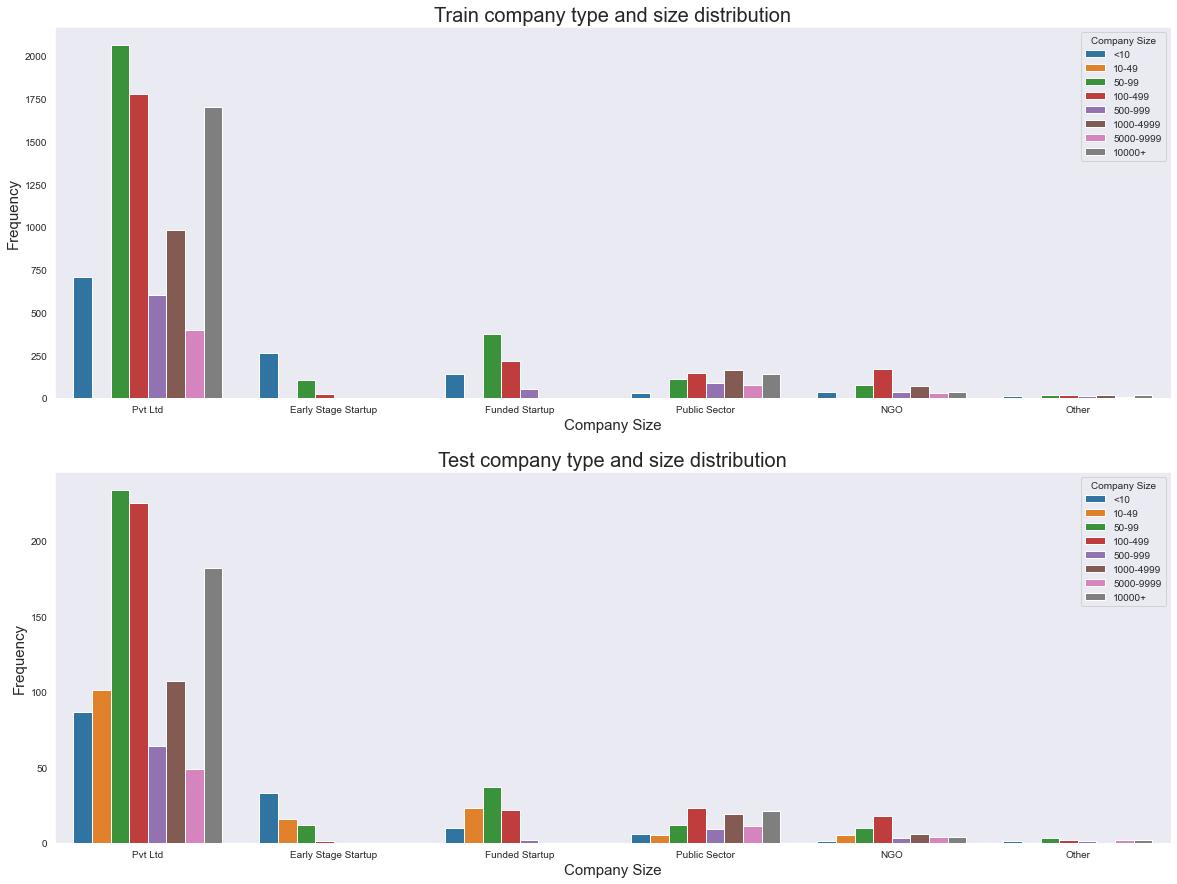

In [24]:
#Set the order of company_type and company_size
company_type_order = ['Pvt Ltd', 'Early Stage Startup', 'Funded Startup', 'Public Sector', 'NGO', 'Other']
company_size_order = ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']

#Plot countplot of company_type and company_size 
f, ax = plt.subplots(nrows = 2,ncols = 1, figsize = (20,15))
sns.countplot(x = 'company_type', hue = 'company_size', order = company_type_order, hue_order = company_size_order, data = train_df, ax = ax[0])
ax[0].set_title("Train company type and size distribution", fontsize = 20)
ax[0].legend(loc='upper right', title='Company Size')
ax[0].set_xlabel("Company Size", fontsize = 15)
ax[0].set_ylabel("Frequency", fontsize = 15)

sns.countplot(x = 'company_type', hue = 'company_size', order = company_type_order, hue_order = company_size_order, data = test_df, ax = ax[1])
ax[1].set_title("Test company type and size distribution", fontsize = 20)
ax[1].legend(loc='upper right', title='Company Size')
ax[1].set_xlabel("Company Size", fontsize = 15)
ax[1].set_ylabel("Frequency", fontsize = 15)

f.subplots_adjust(hspace=0.2)

From the graph we can see that Usually `Early Stage Startup` type company will have less than 10 people so we fill it with **<10**

In [25]:
#Fill nan value with '<10' if company_type is 'Early Stage Startup'
train_df.loc[(train_df.company_size.isna()) 
             & (train_df.company_type == "Early Stage Startup"), ['company_size']] = '<10'
test_df.loc[(test_df.company_size.isna()) 
             & (test_df.company_type == "Early Stage Startup"), ['company_size']] = '<10'

Next, we will use `last_new_job` to help us to fill some missing values in `company_size` and `company_type`. 

In [26]:
#Check unique value in last_new_job
train_df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

If someone's `last_new_job` is **never** and he has **nan** values in both `company_type` and `company_size`, we can indicate his `company_type` and `company_size` as **No company**.

In [27]:
#Fill nan values with 'never' and 'No company' if 'last_new_job' is 'never'
print("      Company Size  Company Type")
print("Before")
print("train:   ", train_df.company_size.isna().sum(), "\t\t", train_df.company_type.isna().sum())
print("test :   ", test_df.company_size.isna().sum(), "\t\t", test_df.company_type.isna().sum())

train_df.loc[(train_df.company_size.isna()) & (train_df.company_type.isna()) 
             & (train_df.last_new_job == 'never'), ["company_type", "company_size"]] = "No company"

test_df.loc[(test_df.company_size.isna()) & (test_df.company_type.isna()) 
             & (test_df.last_new_job == 'never'), ["company_type", "company_size"]] = "No company"
print()
print("After")
print("train:   ", train_df.company_size.isna().sum(),"\t\t", train_df.company_type.isna().sum())
print("test :   ", test_df.company_size.isna().sum(), "\t\t", test_df.company_type.isna().sum())

      Company Size  Company Type
Before
train:    5308 		 5476
test :    577 		 579

After
train:    3995 		 4163
test :    435 		 437


By using this method, we manage to fill some missing values. However, the remaining missing values still contribute a big portion of the dataset, thus we cannot drop them easily. Instead, we will fill those missing values with **Missing**.

In [28]:
#Fill nan values with 'Missing'
train_df['company_size'].fillna("Missing", inplace = True)
train_df['company_type'].fillna("Missing", inplace = True)
test_df['company_size'].fillna("Missing", inplace = True)
test_df['company_type'].fillna("Missing", inplace = True)

#Check nan values in company_size and company_type
print("train: ", train_df.company_size.isna().sum()+train_df.company_type.isna().sum())
print("test : ", test_df.company_size.isna().sum()+test_df.company_type.isna().sum())

train:  0
test :  0


#### Gender data checking and cleaning
In the next step, we will focus on `gender`.

In [29]:
#Check the categories of gender
train_df.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

Since there is a lot of missing values in `gender`, we will not drop these data because we may lose some important information. Hence, we will fill the **nan** values of `gender` with **Unspecified**.

In [30]:
#Fill nan values with 'Unspecified'
train_df['gender'].fillna('Unspecified', inplace = True)
test_df['gender'].fillna('Unspecified', inplace = True)

Text(0, 0.5, 'Frequency')

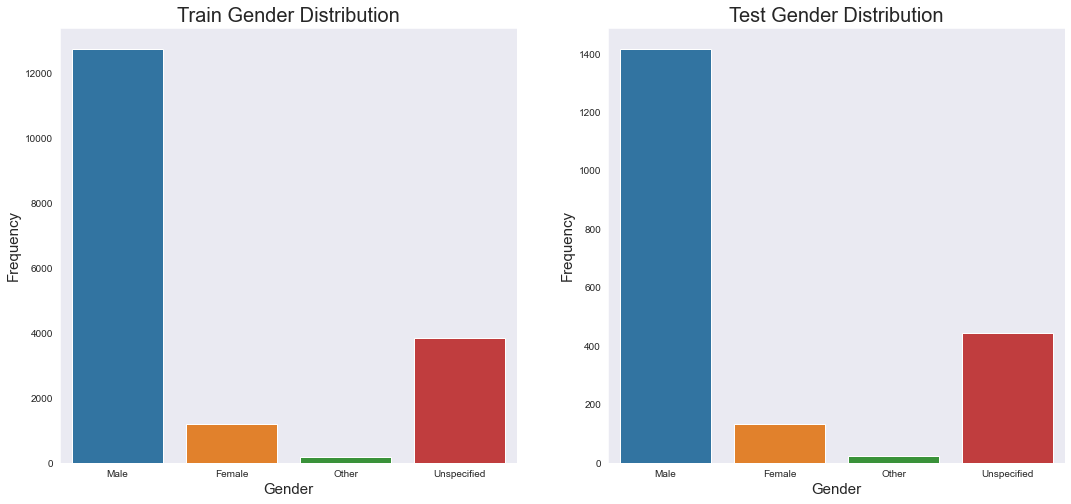

In [31]:
gender_order = ['Male', 'Female', 'Other', 'Unspecified']

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,8))
sns.countplot(x = 'gender', order = gender_order, data = train_df, ax = ax[0])
ax[0].set_title("Train Gender Distribution", fontsize = 20)
ax[0].set_xlabel("Gender", fontsize = 15)
ax[0].set_ylabel("Frequency", fontsize = 15)

sns.countplot(x = 'gender', order = gender_order, data = test_df, ax = ax[1])
ax[1].set_title("Test Gender Distribution", fontsize = 20)
ax[1].set_xlabel("Gender", fontsize = 15)
ax[1].set_ylabel("Frequency", fontsize = 15)

## Major Discipline checking and cleaning
After that, we will do data cleaning of `major_discipline` by comparing to `educational_level`.

In [32]:
#Checking the dataframe
train_df.loc[(train_df.education_level == 'High School') | (train_df.education_level == 'Primary School')]

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
10,0.624,Unspecified,No relevent experience,Full time course,High School,NaN,2,No company,No company,never,32,1.0
14,0.624,Unspecified,No relevent experience,Full time course,High School,NaN,5,No company,No company,never,26,0.0
25,0.855,Unspecified,No relevent experience,no_enrollment,High School,NaN,4,No company,No company,never,22,0.0
28,0.887,Male,Has relevent experience,no_enrollment,High School,NaN,11,<10,Pvt Ltd,1,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19123,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,2,<10,Pvt Ltd,2,12,0.0
19134,0.920,Male,Has relevent experience,Part time course,High School,NaN,12,500-999,Pvt Ltd,>4,13,0.0
19140,0.920,Unspecified,No relevent experience,no_enrollment,Primary School,NaN,2,No company,No company,never,15,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [33]:
#Check the unique value of major_discipline
train_df.loc[(train_df.education_level == 'High School') 
             | (train_df.education_level == 'Primary School')].major_discipline.unique()

array([nan], dtype=object)

From the result above, we can see that all the **nan** values in `major_discipline` has either **Primary School** or **High School** as its `educational_level`. Therefore, we can apply this rule to fill the missing values. 

In [34]:
#Fill nan value with 'No Major'
train_df.loc[(train_df.education_level == 'High School') 
             | (train_df.education_level == 'Primary School'), ['major_discipline']] = "No Major"

test_df.loc[(test_df.education_level == 'High School') 
             | (test_df.education_level == 'Primary School'), ['major_discipline']] = "No Major"

In [35]:
#Check the remaining nan values in major_discipline
print("train: ", train_df.major_discipline.isna().sum())
print("test : ", test_df.major_discipline.isna().sum())

train:  23
test :  1


For the remaining missing values, we can drop them since they are considered anomalies and the amount is negligible.

In [36]:
#Drop nan values
train_df.drop(train_df.loc[train_df.major_discipline.isna()].index, inplace = True)
test_df.drop(test_df.loc[test_df.major_discipline.isna()].index, inplace = True)

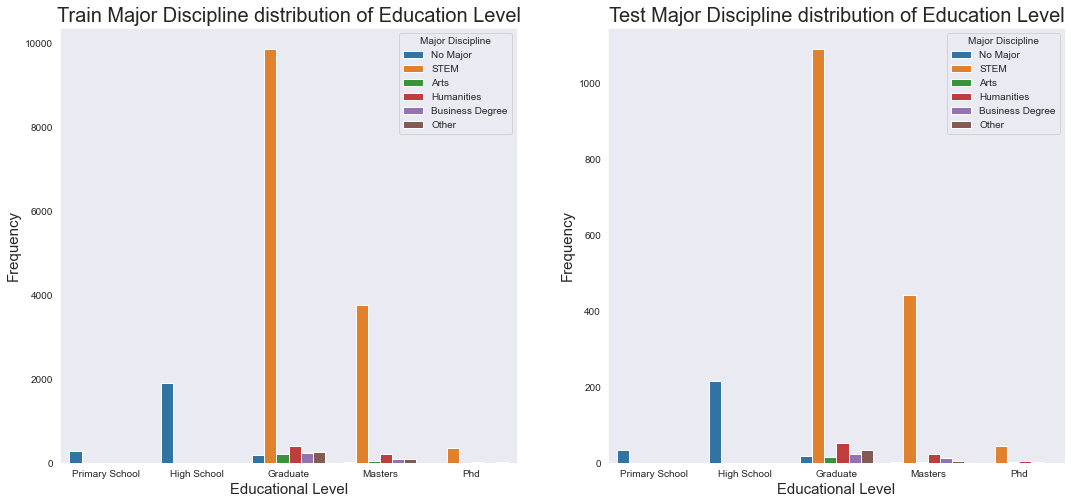

In [37]:
#Set the order of educational_level and major_discipline
major_order = ['No Major', 'STEM', 'Arts', 'Humanities', 'Business Degree', 'Other']
education_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']

#Plot countplot of educational_level and major_discipline
f, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (18,8))

sns.countplot(x = 'education_level', order = education_order, hue = 'major_discipline', hue_order = major_order, data = train_df, ax = ax[0])
ax[0].set_title("Train Major Discipline distribution of Education Level", fontsize = 20)
ax[0].set_xlabel("Educational Level", fontsize = 15)
ax[0].set_ylabel("Frequency", fontsize = 15)
ax[0].legend(title = "Major Discipline")

sns.countplot(x = 'education_level', order = education_order, hue = 'major_discipline', hue_order = major_order, data = test_df, ax = ax[1])
ax[1].set_title("Test Major Discipline distribution of Education Level", fontsize = 20)
ax[1].set_xlabel("Educational Level", fontsize = 15)
ax[1].set_ylabel("Frequency", fontsize = 15)
ax[1].legend(title = "Major Discipline")

Now, we will do a quick scan through of our cleaned dataaset to ensure that we do not leave out any nan values. We will also do some renaming such that the dataset is much concise.

In [38]:
#Check the info of datasets
print("train:")
train_df.info()
print()
print("test:")
test_df.info()

train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17991 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17991 non-null  float64
 1   gender                  17991 non-null  object 
 2   relevent_experience     17991 non-null  object 
 3   enrolled_university     17991 non-null  object 
 4   education_level         17991 non-null  object 
 5   major_discipline        17991 non-null  object 
 6   experience              17991 non-null  object 
 7   company_size            17991 non-null  object 
 8   company_type            17991 non-null  object 
 9   last_new_job            17991 non-null  object 
 10  training_hours          17991 non-null  int64  
 11  target                  17991 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB

test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2128

Last but not least, we decide to rename the `target` value to **Job-Seekers** and **Non Job-Seekers** so that it is more intuitive and readable when we are plotting graphs. 

In [39]:
#Rename target labels to 'Job-Seekers' and 'Non Job-Seekers'
train_df["target"].replace(0.0, 'Non Job-Seekers', inplace=True)
train_df["target"].replace(1.0, 'Job-Seekers', inplace=True)
train_df['target'].value_counts()

Non Job-Seekers    13578
Job-Seekers         4413
Name: target, dtype: int64

Now, the dataset is much cleaner and we can move on to the next phase.

In [41]:
train_df.to_csv("train_clean.csv")
test_df.to_csv("test_clean.csv")